the emergence of chaos through visualized logistic maps

this notebook is following & applying the following resources: 
- https://geoffboeing.com/2015/03/chaos-theory-logistic-map/
- 



In [52]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from datetime import datetime



nonlinear - due to feedback/multiplicative effects between the components, the whole
becomes greater than just the sum of individual parts
dynamical - system changes over time based on is current state (sequential logic circuit)

chaotic systems are a simple sub-type of nonlinear dynamical systems. 
- may contain few interacting parts, following very simple rules
- hyper sensitive dependence on their initial conditions
- deterministic simple foundation, leading to unpredictable and wildly divergent behavior

logistic maps: based on the common s-curve logistic function, showing evolution of growth patterns
- uses a nonlinear difference equation -> Xt+1 = RXt (1 - Xt)
    AKA: future_value = growth_rate * present_value * (1 - present_value)

recursive sequential logic used to map the growth rate, dynamic programming bottom>UP



In [53]:
def logistic_map(x, r):
    return r * x * (1 - x)

In [54]:
# Static Growth Logistic Map Generation
def static_lmap(r, x0, iterations):
    x = np.zeros(iterations)
    x[0] = x0
    for i in range(1, iterations):
        x[i] = logistic_map(x[i-1], r)

    plt.plot(range(iterations), x, label=f"rate={r}")
    plt.xlabel("Iteration")
    plt.ylabel("x")
    plt.title("Logistic Map Dynamics")
    plt.legend()

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"logistic_map_{timestamp}.png"
    plt.savefig(filename)

    print(f"Plot saved as {filename}")

Plot saved as logistic_map_20241212_131303.png


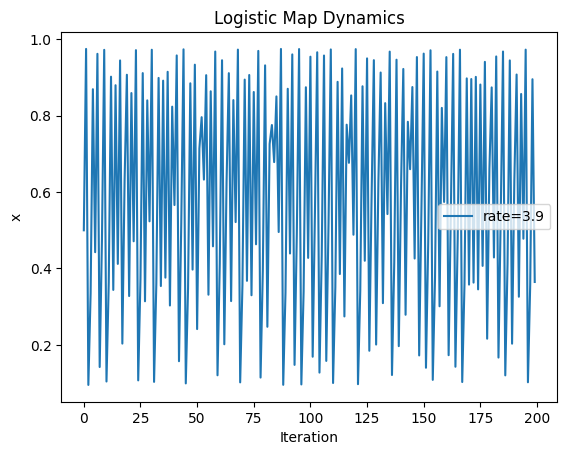

In [55]:
# Test Static LMap w/ Example Parameters
growth_rate = 3.9 
initial_x = 0.5 
iterations = 200
static_lmap(growth_rate, initial_x, iterations)

In [56]:
def dynamic_Lmap(r_min, r_max, num_points, iterations, y_min=0, y_max=1, last=100, save=False):

    # Generate {num_points} growth rates between r_min->r_max
    r_values = np.linspace(r_min, r_max, num_points)
    x_values, r_plot = [], []
    
    x0 = 0.5 # initial condition

    # generate data
    for r in r_values:
        x = x0
        for i in range(iterations):
            x = logistic_map(x, r)
            if i >= iterations - last: # store only steady-state values
                x_values.append(x)
                r_plot.append(r)

    # plot bifurcation diagram
    plt.figure(figsize=(12, 8))
    plt.ylim(y_min, y_max)

    plt.scatter(r_plot, x_values, s=0.1, color='black', alpha=0.5)
    plt.title("bifurcation diagram of the logistic map")
    plt.xlabel("growth rate (r)")
    plt.ylabel("population (x)")
    
    if save:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"bifurcation_diagram_{timestamp}.png"
        plt.savefig(filename)
        print(f"Plot saved as {filename}")

To better visualize the path to chaos, you can take it a step further from the standard linear logistic map visualizations from above by variating the growth rates within a certain range (ex: 200 generations across 1,000 growth rates within a certain range) visualized with a bifurcation diagram 

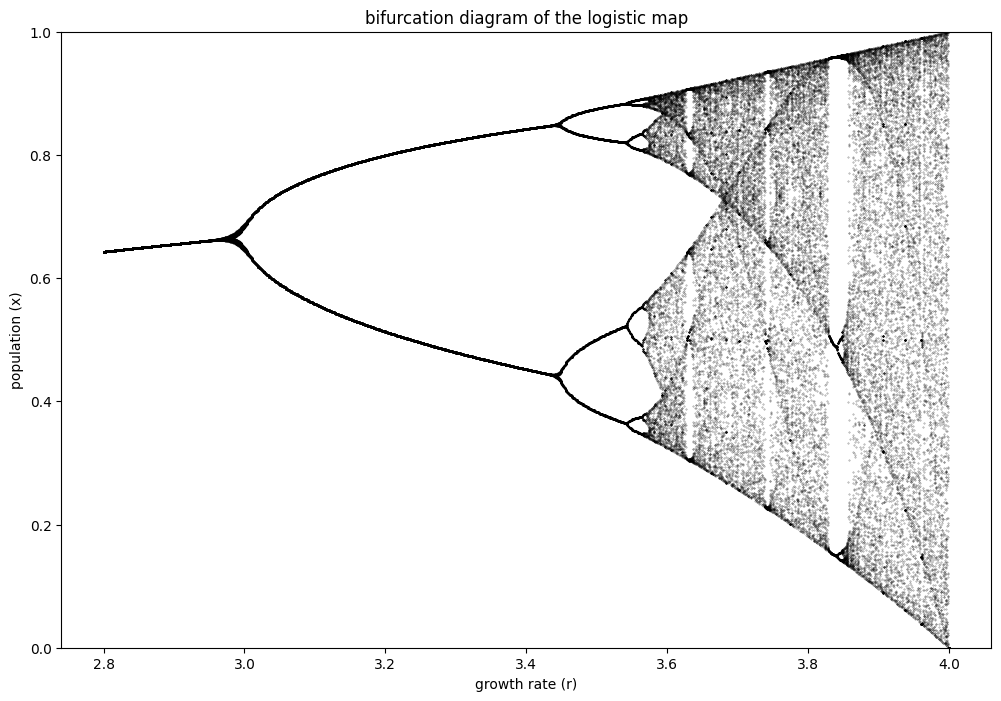

In [57]:
dynamic_Lmap(2.8, 4.0, 1000, 200)

past 3.4 --> diverges into 4 paths (bifurcates)

past 3.5 --> bifurcates into 8 paths

past 3.6 --> absolute chaos

The key analysis from the bifurcation diagrams is that beyond a a growth rate of 3.6, 
the bifurcations ramp up until the system is capable of landing on any point in the system.
To demonstrate the absolute onset of chaos, and how it appears random
let's look at a slice from 3.7 and 3.9

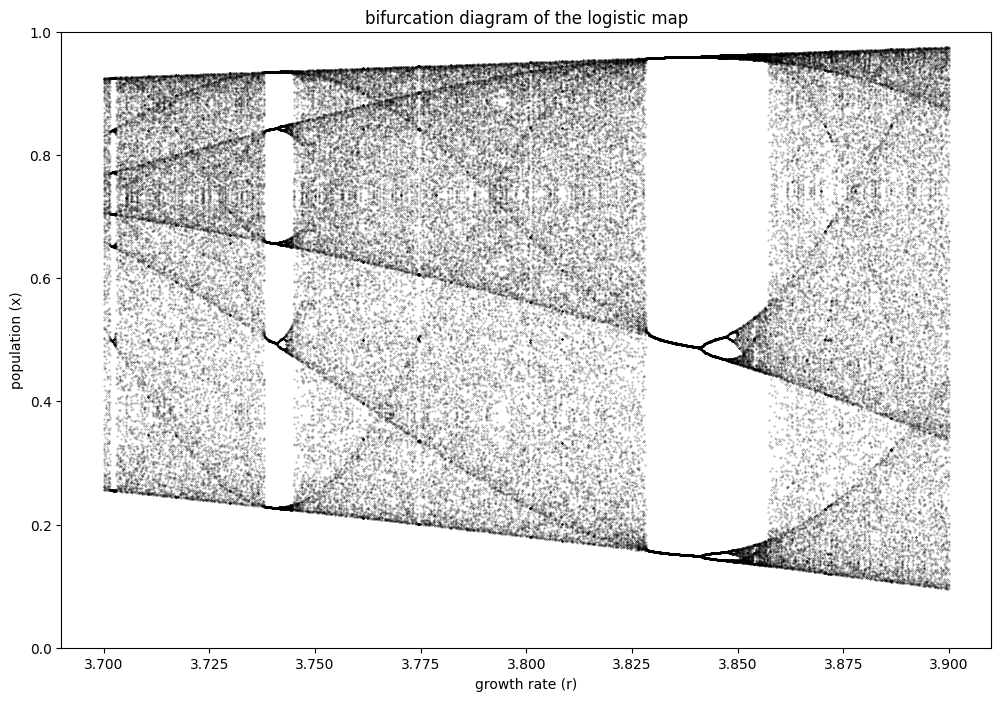

In [58]:
dynamic_Lmap(3.7, 3.9, 1000, 200)

An interesting phenomenon appears to diverge at ~3.85.. let's visualize a smaller slice.. where the structure is almost identical.. except flipped

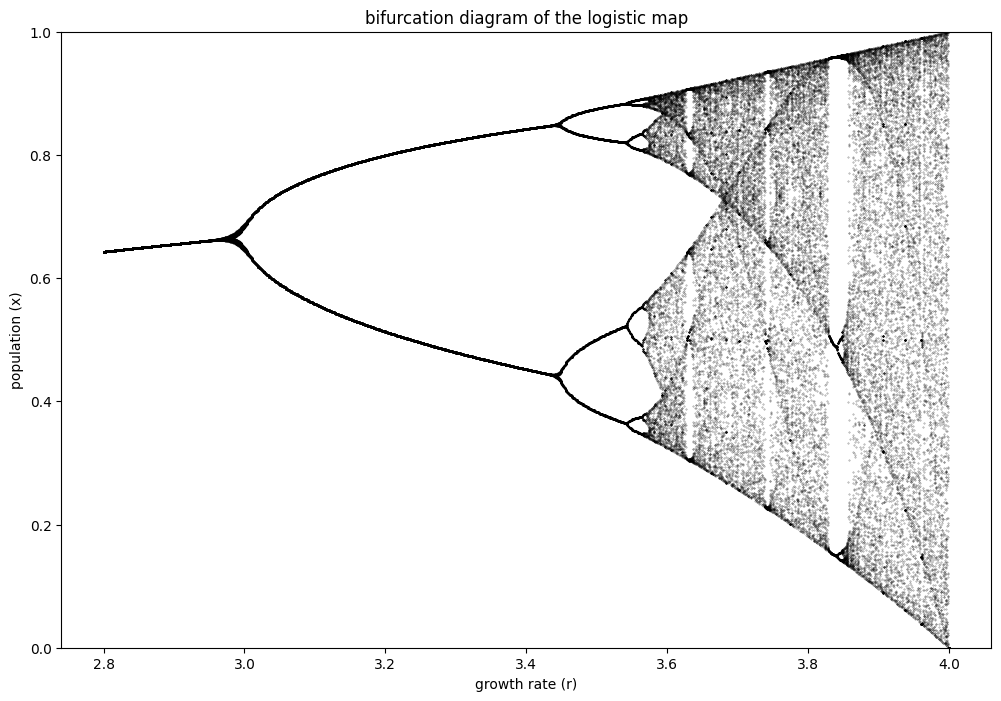

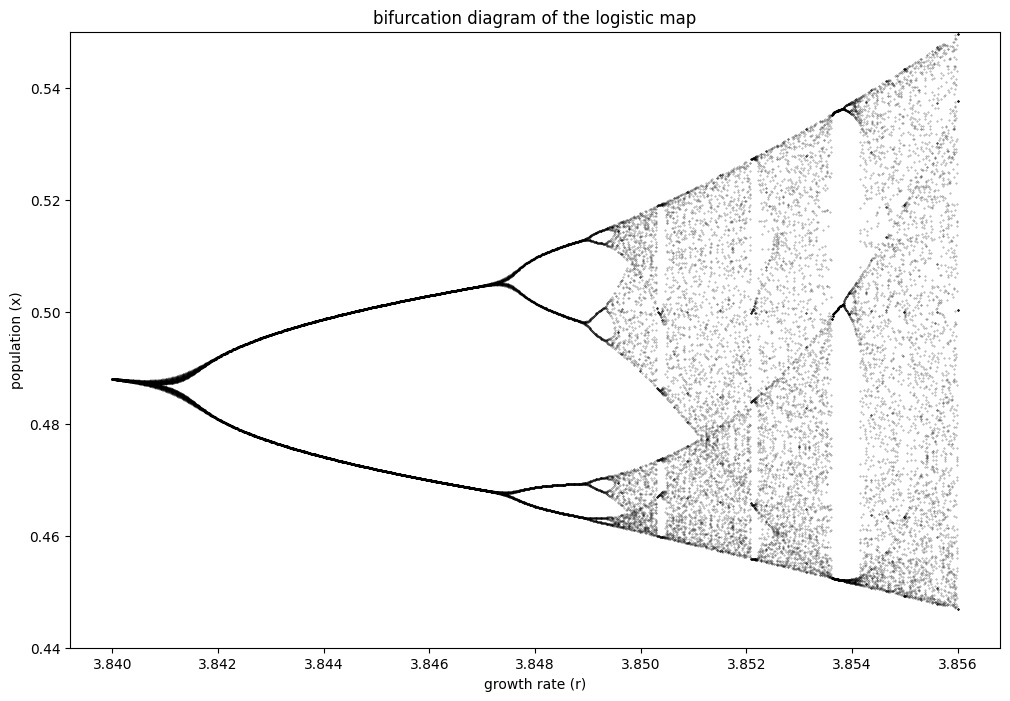

In [59]:
dynamic_Lmap(2.8, 4.0, 1000, 200)
dynamic_Lmap(3.84, 3.856, 1000, 200, y_min=0.44, y_max=0.55)

if you kept zooming in further, infintely, we'll keep seeing the same structure at finer and finer scales

despite this appearing as seemingly complete randomness, there's repetitive recursive structures. how?

chaotic systems have strange attractors and this structure is called a 'fractal', which have the same structure at every scale (self-similar)

this inspires the conversation: chaotic or just random?

